In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0 , test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 104s 1us/step


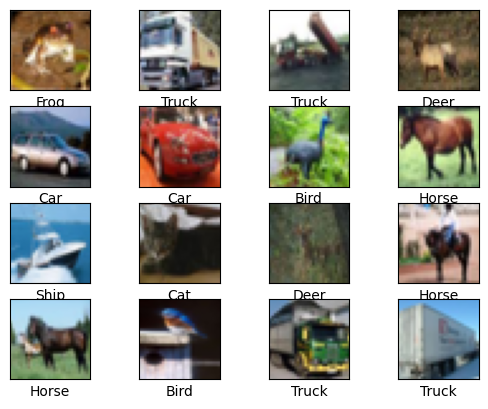

In [4]:
class_names = [ 'Plane' , 'Car' , 'Bird' , 'Cat' , 'Deer' , 'Dog' , 'Frog' , 'Horse' , 'Ship' , 'Truck' ]
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])


In [5]:
# Limit dataset size for faster training
train_images = train_images[: 20000 ]
train_labels = train_labels[: 20000 ]
test_images = test_images[: 4000 ]
test_labels = test_labels[: 4000 ]

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D( 32, ( 3 , 3 ), activation = 'relu', input_shape =( 32 , 32 , 3 )))
model.add(layers.MaxPooling2D(( 2 , 2 )))
model.add(layers.Conv2D( 64, ( 3 , 3 ), activation = 'relu' ))
model.add(layers.MaxPooling2D(( 2 , 2 )))
model.add(layers.Conv2D( 64, ( 3 , 3 ), activation = 'relu' ))
model.add(layers.Flatten())
model.add(layers.Dense( 64, activation = 'relu' ))
model.add(layers.Dense( 10, activation = 'softmax' ))

model.compile( optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics =[ 'accuracy' ])

In [11]:
model.fit(train_images,
train_labels,
epochs = 10 ,
validation_data =(test_images, test_labels))


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8525 - loss: 0.4143 - val_accuracy: 0.6045 - val_loss: 1.4765
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8643 - loss: 0.3761 - val_accuracy: 0.6223 - val_loss: 1.4978
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8763 - loss: 0.3452 - val_accuracy: 0.6035 - val_loss: 1.5903
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8860 - loss: 0.3213 - val_accuracy: 0.6043 - val_loss: 1.6785
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.9000 - loss: 0.2840 - val_accuracy: 0.6150 - val_loss: 1.8117
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9043 - loss: 0.2689 - val_accuracy: 0.6108 - val_loss: 1.8043
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.9197 - loss: 0.2348 - val_accuracy: 0.6168 - val_loss: 1.9018
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9147 - loss: 0.2348 - 

In [13]:
model.save('cnn_model.keras')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)


125/125 - 1s - 8ms/step - accuracy: 0.6118 - loss: 2.2664


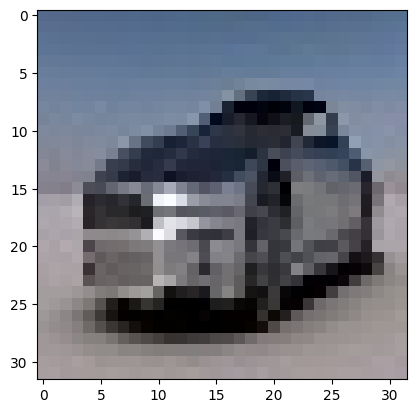

In [12]:
img1 = cv.imread('car.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('horse.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.imshow(img1, cmap=plt.cm.binary)
plt.show()

In [14]:
prediction = model.predict(np.array([img1])/255)
index = np.argmax(prediction)
print("Predicted class:", class_names[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
Predicted class: Truck


In [ ]:
# Same Sturcture but trained on the full dataset along with 15 epochs
new_model = models.load_model('cnn_model_full.keras')
prediction = new_model.predict(np.array([img1])/255)
index = np.argmax(prediction)
print("Predicted class with the new model:", class_names[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted class with the new model: Car


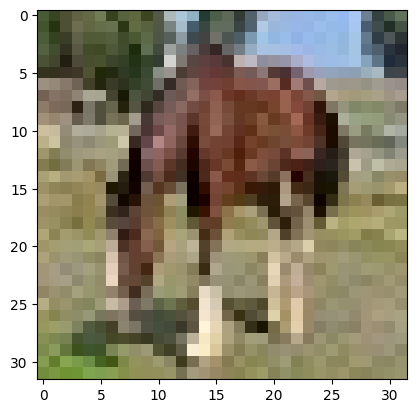

In [16]:
plt.imshow(img2, cmap=plt.cm.binary)
plt.show()

In [17]:
prediction1 = model.predict(np.array([img2])/255)
index1 = np.argmax(prediction1)
print("Predicted class:", class_names[index1])

prediction2 = new_model.predict(np.array([img2])/255)
index2 = np.argmax(prediction2)
print("Predicted class with the new model:", class_names[index2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted class: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted class with the new model: Horse
